In [1]:
from google.colab import files
uploaded= files.upload()

Saving Australia_drought.csv to Australia_drought.csv
Saving Argentina_drought.csv to Argentina_drought.csv
Saving Afghanistan_drought_Labelled.csv to Afghanistan_drought_Labelled.csv


In [171]:
import pandas as pd
import numpy as np
import csv
from tqdm import tqdm
import base64
from io import BytesIO
import requests
import re
import io
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
australia_drought= pd.read_csv('Australia_drought.csv')
# argentina_drought= pd.read_csv('Argentina_drought.csv')
# afghanistan_drought= pd.read_csv('Afghanistan_drought_Labelled.csv')

In [150]:
australia_drought.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,category,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.401532e+18,1.401531e+18,2021-06-06 09:31:31 EDT,2021-06-06,09:31:31 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,@horizon9soo @weareoneEXO deleted pleasee they...,none,en,[],[],[],0,0,0,[],[],https://twitter.com/aeri_zayllz1/status/140153...,FALSE,NaN,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'horizon9soo', 'name': 'only ...",NaN,NaN,NaN,NaN
1,1.401532e+18,1.401529e+18,2021-06-06 09:29:01 EDT,2021-06-06,09:29:01 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,@cloudmixolydian yess🤧♥️,none,en,[],[],[],0,0,1,[],[],https://twitter.com/aeri_zayllz1/status/140153...,FALSE,NaN,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'cloudmixolydian', 'name': '☁...",NaN,NaN,NaN,NaN
2,1.401529e+18,1.401529e+18,2021-06-06 09:20:26 EDT,2021-06-06,09:20:26 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,johnny looks like he's a senior idol to them a...,none,en,[],[],['https://pbs.twimg.com/media/E3M7ky7UUAEyfpx....,1,0,1,[],[],https://twitter.com/aeri_zayllz1/status/140152...,FALSE,https://twitter.com/cloudmixolydian/status/140...,1.0,https://pbs.twimg.com/media/E3M7ky7UUAEyfpx.jpg,Australia,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.401522e+18,1.401516e+18,2021-06-06 08:52:27 EDT,2021-06-06,08:52:27 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,@_waitingforyeol @aespachartsdata @aespa_offic...,none,en,[],[],[],1,0,1,[],[],https://twitter.com/aeri_zayllz1/status/140152...,FALSE,NaN,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_waitingforyeol', 'name': 'J...",NaN,NaN,NaN,NaN
4,1.401522e+18,1.401516e+18,2021-06-06 08:51:14 EDT,2021-06-06,08:51:14 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,@_waitingforyeol @aespachartsdata @aespa_offic...,none,en,[],[],[],1,0,2,[],[],https://twitter.com/aeri_zayllz1/status/140152...,FALSE,NaN,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_waitingforyeol', 'name': 'J...",NaN,NaN,NaN,NaN
5,1.401521e+18,1.401521e+18,2021-06-06 08:47:13 EDT,2021-06-06,08:47:13 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,15 likes I won’t take a bath tomorrow,none,en,[],[],[],0,0,1,[],[],https://twitter.com/aeri_zayllz1/status/140152...,FALSE,NaN,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,1.401518e+18,1.401518e+18,2021-06-06 08:36:49 EDT,2021-06-06,08:36:49 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,@idalsoz @ncitystruggles lmao😆,none,ht,[],[],[],0,0,1,[],[],https://twitter.com/aeri_zayllz1/status/140151...,FALSE,NaN,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'idalsoz', 'name': 'ًHAECHAN ...",NaN,NaN,NaN,NaN
7,1.401516e+18,1.401509e+18,2021-06-06 08:28:44 EDT,2021-06-06,08:28:44 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,@AESPAIntl @aespa_official https://t.co/Sn099...,NaN,und,[],[],['https://pbs.twimg.com/media/E3MvvRCVEAIRCvv....,0,0,0,[],[],https://twitter.com/aeri_zayllz1/status/140151...,FALSE,NaN,1.0,https://pbs.twimg.com/media/E3MvvRCVEAIRCvv.jpg,Australia,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AESPAIntl', 'name': 'AESPA I...",NaN,NaN,NaN,NaN
8,1.401497e+18,1.401497e+18,2021-06-06 07:09:40 EDT,2021-06-06,07:09:40 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,me when i can't dance to both of it,none,en,[],[],[],0,0,0,[],[],https://twitter.com/aeri_zayllz1/status/140149...,FALSE,https://twitter.com/vaInetine/status/140131683...,0.0,NaN,Australia,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,1.401495e+18,1.401495e+18,2021-06-06 07:04:54 EDT,2021-06-06,07:04:54 AM,-400,1.382694e+18,aeri_zayllz1,zayll • | DROUGHT ERA🌕🎮,NaN,SM when giselle joined the company as the fina...,none,en,[],[],['https://pbs.t

In [151]:
australia_drought.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'category', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url',
       'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [152]:
#Removing unwanted columns
australia_drought= australia_drought.drop(['conversation_id', 'created_at','timezone','user_id', 'username', 'name','place','mentions', 
                                           'urls','replies_count', 'retweets_count','likes_count','cashtags', 'retweet', 'quote_url',
                                           'video', 'thumbnail','geo','user_rt_id', 'user_rt','retweet_id', 'reply_to', 'retweet_date', 
                                           'translate', 'trans_src','trans_dest','source'],axis=1)

In [153]:
australia_drought.columns

Index(['id', 'date', 'time', 'tweet', 'category', 'language', 'photos',
       'hashtags', 'link', 'near'],
      dtype='object')

In [154]:
#rename the column names
australia_drought.rename(columns={'id':'Id','link':'source URL','near':'country','hashtags':'keywords'},inplace=True)

In [155]:
#merge tweet and photos column and drop tweet and photos link seperate column
australia_drought['body']= australia_drought['tweet']+australia_drought['photos']
australia_drought= australia_drought.drop(['tweet','photos'],axis=1)

In [156]:
#merge data and time column 
australia_drought['time']= australia_drought['date']+' '+australia_drought['time']
australia_drought= australia_drought.drop(['date'],axis=1)

In [157]:
#added data source column
australia_drought['data source']= 'Twitter'

In [158]:
australia_drought['time']= pd.to_datetime(australia_drought['time'], errors='coerce',utc=True)
australia_drought['Id']= australia_drought['Id'].astype(object)

In [159]:
australia_drought.head(5)

,Id,time,category,language,keywords,source URL,country,body,data source
0,1.40153e+18,2021-06-06 09:31:31+00:00,none,en,[],https://twitter.com/aeri_zayllz1/status/140153...,Australia,@horizon9soo @weareoneEXO deleted pleasee they...,Twitter
1,1.40153e+18,2021-06-06 09:29:01+00:00,none,en,[],https://twitter.com/aeri_zayllz1/status/140153...,Australia,@cloudmixolydian yess🤧♥️[],Twitter
2,1.40153e+18,2021-06-06 09:20:26+00:00,none,en,[],https://twitter.com/aeri_zayllz1/status/140152...,Australia,johnny looks like he's a senior idol to them a...,Twitter
3,1.40152e+18,2021-06-06 08:52:27+00:00,none,en,[],https://twitter.com/aeri_zayllz1/status/140152...,Australia,@_waitingforyeol @aespachartsdata @aespa_offic...,Twitter
4,1.40152e+18,2021-06-06 08:51:14+00:00,none,en,[],https://twitter.com/aeri_zayllz1/status/140152...,Australia,@_waitingforyeol @aespachartsdata @aespa_offic...,Twitter


In [160]:
australia_drought.shape

(158, 9)

In [161]:
#filter the column whose language is not english
australia_drought = australia_drought.loc[australia_drought['language'] =='en']

In [162]:
australia_drought.shape

(147, 9)

In [163]:
australia_drought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 157
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Id           147 non-null    object             
 1   time         147 non-null    datetime64[ns, UTC]
 2   category     146 non-null    object             
 3   language     147 non-null    object             
 4   keywords     147 non-null    object             
 5   source URL   147 non-null    object             
 6   country      147 non-null    object             
 7   body         147 non-null    object             
 8   data source  147 non-null    object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 11.5+ KB


In [164]:
australia_drought.dropna(inplace=True)

In [165]:
australia_drought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 157
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Id           146 non-null    object             
 1   time         146 non-null    datetime64[ns, UTC]
 2   category     146 non-null    object             
 3   language     146 non-null    object             
 4   keywords     146 non-null    object             
 5   source URL   146 non-null    object             
 6   country      146 non-null    object             
 7   body         146 non-null    object             
 8   data source  146 non-null    object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 11.4+ KB


In [166]:
australia_drought['title']=''

In [167]:
australia_drought= australia_drought[['Id','title','time','keywords','data source','category','country','source URL','body','language']]

In [168]:
australia_drought.head(7)

,Id,title,time,keywords,data source,category,country,source URL,body,language
0,1.40153e+18,,2021-06-06 09:31:31+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140153...,@horizon9soo @weareoneEXO deleted pleasee they...,en
1,1.40153e+18,,2021-06-06 09:29:01+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140153...,@cloudmixolydian yess🤧♥️[],en
2,1.40153e+18,,2021-06-06 09:20:26+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,johnny looks like he's a senior idol to them a...,en
3,1.40152e+18,,2021-06-06 08:52:27+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,@_waitingforyeol @aespachartsdata @aespa_offic...,en
4,1.40152e+18,,2021-06-06 08:51:14+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,@_waitingforyeol @aespachartsdata @aespa_offic...,en
5,1.40152e+18,,2021-06-06 08:47:13+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,15 likes I won’t take a bath tomorrow[],en
8,1.4015e+18,,2021-06-06 07:09:40+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140149...,me when i can't dance to both of it[],en


**preprocess body(tweets)= removed 'https' links and username defined by @, as links are not useful**


In [181]:
def cleaned_data(text):
    clean=re.sub("http\S+","",text)
    clean = clean.lower()
    clean=re.sub("@\S+","",clean)
    clean = re.sub('#', ' ', clean)
    clean = re.sub('&amp', ' ', clean)
    # clean = re.sub(':', ' ', clean)
    clean = re.sub('/', ' ', clean)
    clean = re.sub(r'\?{2,}', '?', clean)
    clean = re.sub(r'\!{2,}', '!', clean)
    clean = re.sub(r'\.{2,}', '.', clean)
    clean = re.sub('\[', '', clean)
    clean = re.sub('\]', '', clean)
    clean = re.sub(';', '', clean)
    clean = re.sub(r'[(]', ' ', clean)
    clean = re.sub(r'[)]', ' ', clean)
    clean = re.sub(r'@', ' ', clean)
    # clean = re.sub(r'/*', ' ', clean)
    clean = re.sub('-', ' ', clean)
    # clean = re.sub(r'([a-z])\1+', r'\1', clean)  # this is for bring character to once if it is repeating more than once
    # clean = re.sub('flod', 'flood', clean)
    # clean = re.sub('floding', 'flooding', clean)
    clean=re.sub('"'," ",clean)
    clean=re.sub("\s{2,}"," ",clean)
    clean=clean.strip()
    # clean = TextBlob(clean).correct()
    return clean

In [182]:
australia_drought['cleaned body'] = australia_drought['body'].apply(cleaned_data)

In [183]:
!pip install contractions

In [184]:
import contractions

In [185]:
def expanded(text):
    expanded_words = []    
    try:
      for word in text.split():
        expanded_words.append(contractions.fix(word))
    except Exception:
      pass         
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [189]:
australia_drought['cleaned body'] = australia_drought['cleaned body'].apply(expanded)

In [187]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def final_pre_pro(text):
  clean = re.sub('\+','',text)
  clean = re.sub('=','',text)
  clean = re.sub('\_{2,}',' ',text)
  clean = re.sub('\*',' ',text)
  clean=re.sub("\s{2,}"," ",clean)
  return clean.strip()

In [188]:
australia_drought['cleaned body'] = australia_drought['cleaned body'].apply(remove_emojis)
australia_drought['cleaned body'] = australia_drought['cleaned body'].apply(final_pre_pro)

In [190]:
australia_drought.head(5)

,Id,title,time,keywords,data source,category,country,source URL,body,language,cleaned body
0,1.40153e+18,,2021-06-06 09:31:31+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140153...,@horizon9soo @weareoneEXO deleted pleasee they...,en,deleted pleasee they do not want us to post it
1,1.40153e+18,,2021-06-06 09:29:01+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140153...,@cloudmixolydian yess🤧♥️[],en,yess
2,1.40153e+18,,2021-06-06 09:20:26+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,johnny looks like he's a senior idol to them a...,en,johnny looks like he is a senior idol to them ...
3,1.40152e+18,,2021-06-06 08:52:27+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,@_waitingforyeol @aespachartsdata @aespa_offic...,en,ohh sorry for that
4,1.40152e+18,,2021-06-06 08:51:14+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,@_waitingforyeol @aespachartsdata @aespa_offic...,en,i think you misread the tweet bestie


In [191]:
#rearange all columns as per final datsets column
australia_drought= australia_drought[['Id','title','time','keywords','data source','category','country','source URL','body','cleaned body','language']]

In [192]:
australia_drought.head(5)

,Id,title,time,keywords,data source,category,country,source URL,body,cleaned body,language
0,1.40153e+18,,2021-06-06 09:31:31+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140153...,@horizon9soo @weareoneEXO deleted pleasee they...,deleted pleasee they do not want us to post it,en
1,1.40153e+18,,2021-06-06 09:29:01+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140153...,@cloudmixolydian yess🤧♥️[],yess,en
2,1.40153e+18,,2021-06-06 09:20:26+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,johnny looks like he's a senior idol to them a...,johnny looks like he is a senior idol to them ...,en
3,1.40152e+18,,2021-06-06 08:52:27+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,@_waitingforyeol @aespachartsdata @aespa_offic...,ohh sorry for that,en
4,1.40152e+18,,2021-06-06 08:51:14+00:00,[],Twitter,none,Australia,https://twitter.com/aeri_zayllz1/status/140152...,@_waitingforyeol @aespachartsdata @aespa_offic...,i think you misread the tweet bestie,en


In [193]:
australia_drought['category'].value_counts()

none                 101
drought               41
flood and drought      4
Name: category, dtype: int64

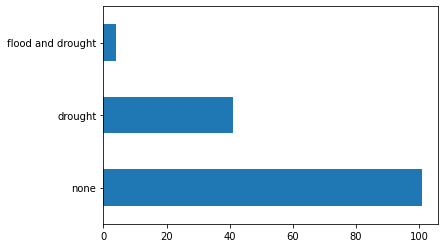

In [194]:
australia_drought['category'].value_counts().plot(kind='barh')

In [195]:
australia_drought.to_csv('australia_drought_tweets_transformed.csv', index=False)